In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()  # Use this to upload the CSV file

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')


Saving Unemployment in India.csv to Unemployment in India.csv


In [3]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# Drop rows with missing values
df_cleaned = df.dropna()

# Strip leading/trailing whitespace from the 'Date' column
df_cleaned['Date'] = df_cleaned['Date'].str.strip()

# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')

# Check the structure of the data
print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
None
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                  

<ipython-input-3-375dd45208b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = df_cleaned['Date'].str.strip()
<ipython-input-3-375dd45208b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')


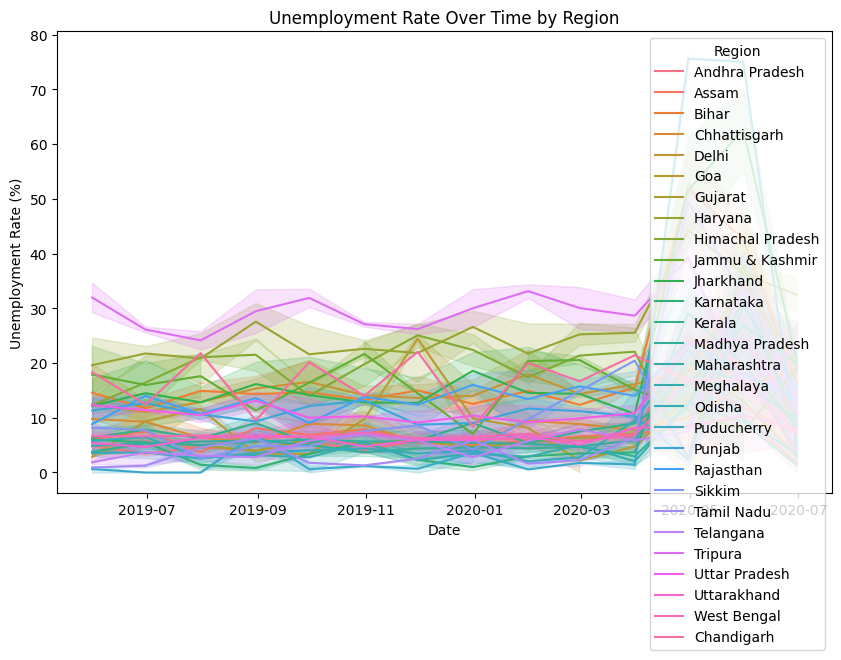

In [4]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=df_cleaned)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


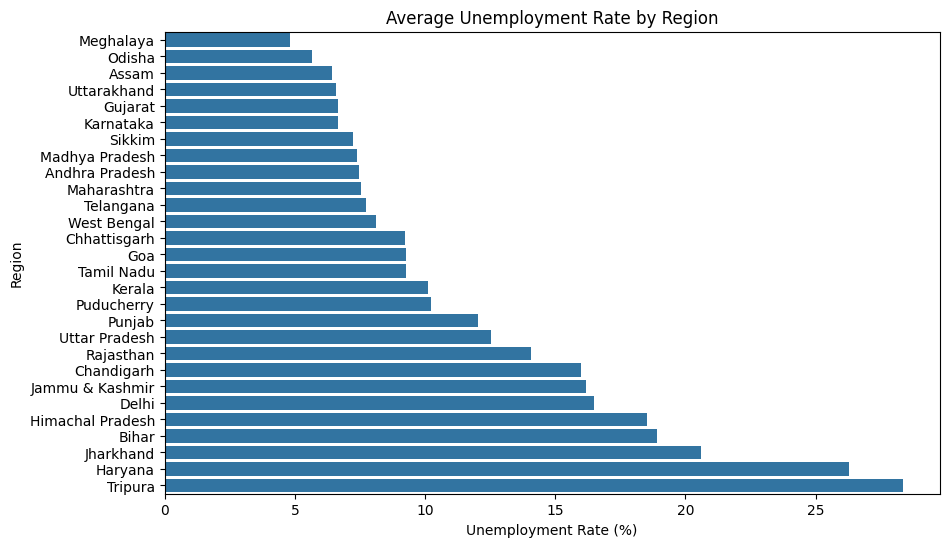

In [5]:
avg_unemployment = df_cleaned.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


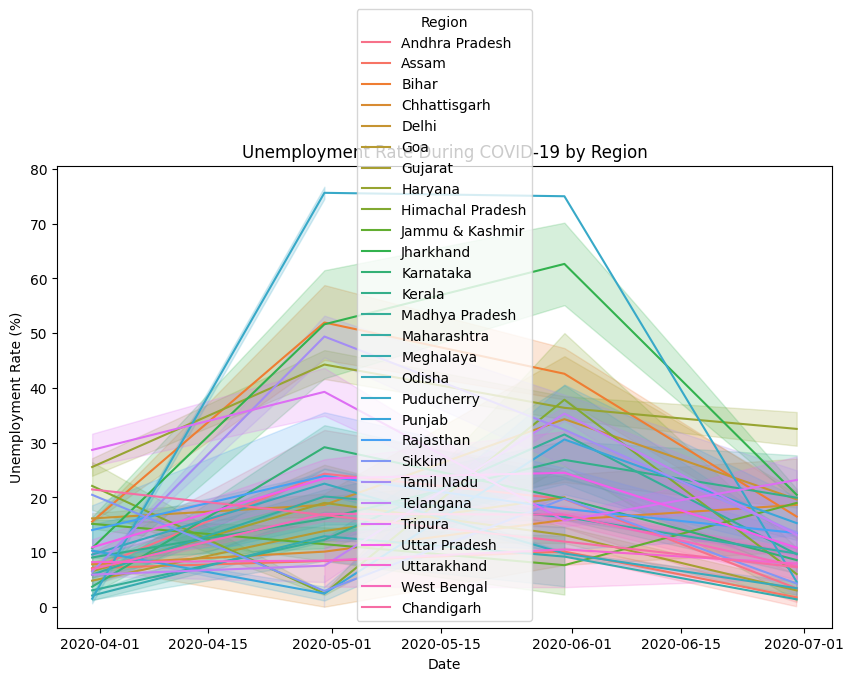

In [6]:
# Filter data for COVID-19 period (e.g., March 2020 onwards)
covid_data = df_cleaned[df_cleaned['Date'] >= '2020-03-01']

# Plot unemployment rate during COVID-19
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=covid_data)
plt.title('Unemployment Rate During COVID-19 by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


In [7]:
# Correlation between unemployment and labor participation rate
correlation = df_cleaned[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']].corr()
print(correlation)


                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Labour Participation Rate (%)                                 1.000000  
